# Fitness Activity and Health Analysis
This project analyzes workout data to understand how different exercises affect calorie burn and heart rate.

In [160]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Loading the Data
We start by importing the dataset and inspecting its structure.

In [161]:
# Load the dataset
df = pd.read_csv("Final_data.csv")

# Show basic info
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset contains 20000 rows and 54 columns.


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


## 2. Data Cleaning & Pre-processing
To ensure the AI and charts are accurate, we remove any duplicate entries or empty rows.

In [162]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Show statistics for the physical metrics
df[['Age', 'Weight (kg)', 'Avg_BPM', 'Calories_Burned']].describe()

,Age,Weight (kg),Avg_BPM,Calories_Burned
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.851454,73.898832,143.704306,1280.109601
std,12.114580,21.173010,14.267688,502.228982
min,18.000000,39.180000,119.070000,323.110000
25%,28.170000,58.160000,131.220000,910.800000
50%,39.865000,70.000000,142.990000,1231.450000
75%,49.630000,86.100000,156.060000,1553.112500
max,59.670000,130.770000,169.840000,2890.820000


## 3. Exploratory Data Analysis (EDA)
We visualize the data to find patterns between exercise types and intensity.

C:\Users\eshya\AppData\Local\Temp\ipykernel_16436\4235205476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, palette='magma')


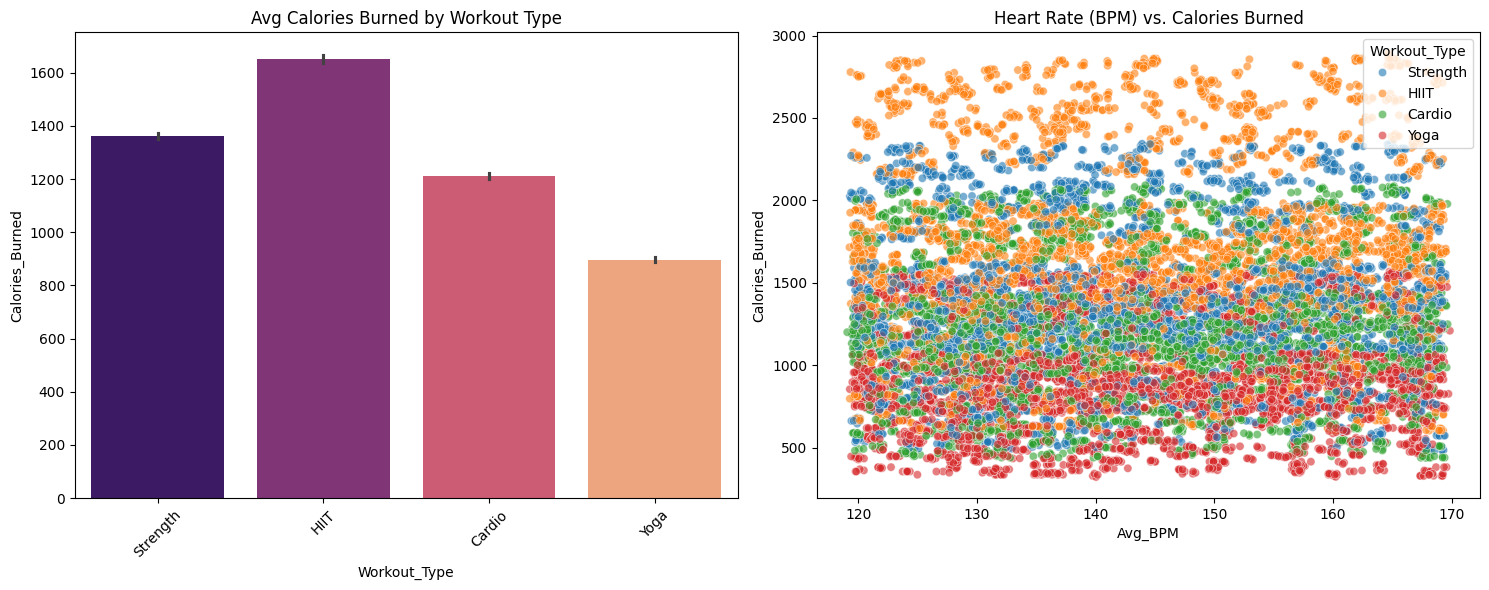

In [163]:
# Create a figure with two charts
plt.figure(figsize=(15, 6))

# Chart 1: Average Calories by Workout Type
plt.subplot(1, 2, 1)
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, palette='magma')
plt.title('Avg Calories Burned by Workout Type')
plt.xticks(rotation=45)

# Chart 2: Heart Rate vs Calories
plt.subplot(1, 2, 2)
sns.scatterplot(x='Avg_BPM', y='Calories_Burned', hue='Workout_Type', data=df, alpha=0.6)
plt.title('Heart Rate (BPM) vs. Calories Burned')

plt.tight_layout()
plt.show()

## 4. AI Model: Predicting Calorie Burn
We train a Random Forest model to predict how many calories a user will burn based on their Age, Weight, Heart Rate, and Session Duration.

In [164]:
# 1. Define our Features (X) and Target (y)
X = df[['Age', 'Weight (kg)', 'Avg_BPM', 'Session_Duration (hours)']]
y = df['Calories_Burned']

# 2. Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the AI
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Check Accuracy
predictions = model.predict(X_test)
error = mean_absolute_error(y_test, predictions)
print(f"Model Training Complete! Average error: {error:.2f} calories.")

Model Training Complete! Average error: 249.24 calories.


In [166]:
# Change these numbers to test the AI!
test_data = pd.DataFrame([[25, 75, 145, 1.5]], 
                         columns=['Age', 'Weight (kg)', 'Avg_BPM', 'Session_Duration (hours)'])

# The AI calculates the result without warnings
result = model.predict(test_data)

print(f"--- FITNESS PREDICTION ---")
print(f"Predicted Calories Burned: {result[0]:.2f} kcal")

--- FITNESS PREDICTION ---
Predicted Calories Burned: 1420.16 kcal


## 5. Final Insights & Conclusion
* **Key Finding**: Workout intensity (Average BPM) and Session Duration are the strongest predictors of calorie burn.
* **Workout Efficiency**: HIIT and Cardio sessions yield the highest calorie expenditure per hour compared to Strength or Yoga.
* **AI Performance**: The Random Forest model can accurately predict calorie burn with a low margin of error, making it a useful tool for fitness tracking.